In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('breastcancer1.csv')

In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              564 non-null    float64
 3   texture_mean             561 non-null    float64
 4   perimeter_mean           561 non-null    float64
 5   area_mean                564 non-null    float64
 6   smoothness_mean          566 non-null    float64
 7   compactness_mean         566 non-null    float64
 8   concavity_mean           566 non-null    float64
 9   concave points_mean      562 non-null    float64
 10  symmetry_mean            564 non-null    float64
 11  fractal_dimension_mean   564 non-null    float64
 12  radius_se                568 non-null    float64
 13  texture_se               568 non-null    float64
 14  perimeter_se             5

In [5]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                5
texture_mean               8
perimeter_mean             8
area_mean                  5
smoothness_mean            3
compactness_mean           3
concavity_mean             3
concave points_mean        7
symmetry_mean              5
fractal_dimension_mean     5
radius_se                  1
texture_se                 1
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df['radius_mean'] = df['radius_mean'].fillna(df['radius_mean'].mean())
df['texture_mean'] = df['texture_mean'].fillna(df['texture_mean'].mean())
df['perimeter_mean'] = df['perimeter_mean'].fillna(df['perimeter_mean'].mean())
df['area_mean'] = df['area_mean'].fillna(df['area_mean'].mean())
df['smoothness_mean'] = df['smoothness_mean'].fillna(df['smoothness_mean'].mean())
df['compactness_mean'] = df['compactness_mean'].fillna(df['compactness_mean'].mean())
df['concavity_mean'] = df['concavity_mean'].fillna(df['concavity_mean'].mean())
df['concave points_mean'] = df['concave points_mean'].fillna(df['concave points_mean'].mean())
df['symmetry_mean'] = df['symmetry_mean'].fillna(df['symmetry_mean'].mean())
df['fractal_dimension_mean'] = df['fractal_dimension_mean'].fillna(df['fractal_dimension_mean'].mean())
df['radius_se'] = df['radius_se'].fillna(df['radius_se'].mean())
df['texture_se'] = df['texture_se'].fillna(df['texture_se'].mean())

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df.shape

(569, 32)

In [17]:
y=df['diagnosis']
X=df[['texture_mean','radius_mean']]

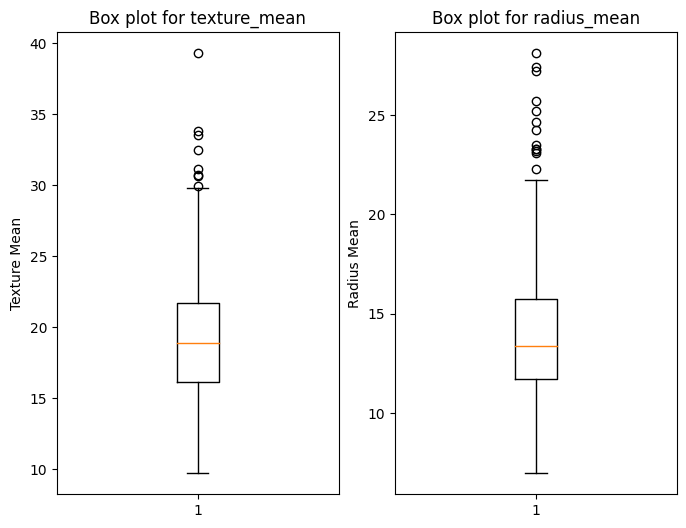

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['texture_mean'])
plt.title('Box plot for texture_mean')
plt.ylabel('Texture Mean')

plt.subplot(1, 2, 2)
plt.boxplot(df['radius_mean'])
plt.title('Box plot for radius_mean')
plt.ylabel('Radius Mean')

plt.show()

In [19]:
Q1_texture = df['texture_mean'].quantile(0.25)
Q3_texture = df['texture_mean'].quantile(0.75)
IQR_texture = Q3_texture - Q1_texture

Q1_radius = df['radius_mean'].quantile(0.25)
Q3_radius = df['radius_mean'].quantile(0.75)
IQR_radius = Q3_radius - Q1_radius

lower_bound_texture = Q1_texture - 1.5 * IQR_texture
upper_bound_texture = Q3_texture + 1.5 * IQR_texture

lower_bound_radius = Q1_radius - 1.5 * IQR_radius
upper_bound_radius = Q3_radius + 1.5 * IQR_radius

df_cleaned = df[(df['texture_mean'] >= lower_bound_texture) & (df['texture_mean'] <= upper_bound_texture) &
                (df['radius_mean'] >= lower_bound_radius) & (df['radius_mean'] <= upper_bound_radius)]

print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

Original dataset shape: (569, 32)
Cleaned dataset shape: (548, 32)


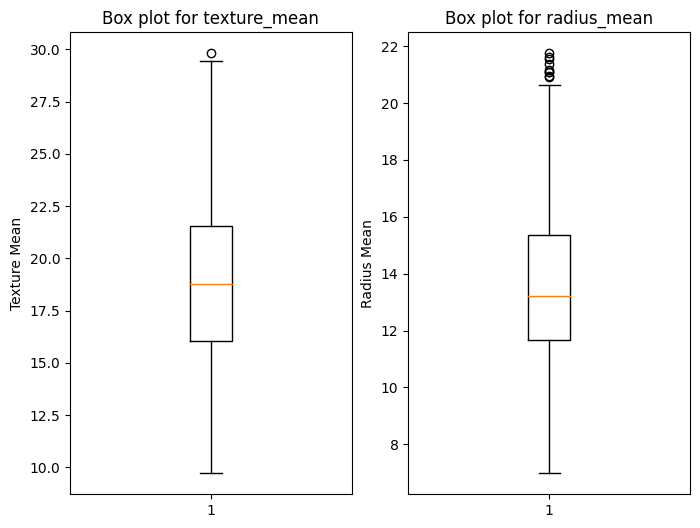

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_cleaned['texture_mean'])
plt.title('Box plot for texture_mean')
plt.ylabel('Texture Mean')

plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned['radius_mean'])
plt.title('Box plot for radius_mean')
plt.ylabel('Radius Mean')

plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X.size

1138

In [24]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = list(range(1, 30))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)    
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
for k, accuracy in zip(k_values, accuracies):
    print(f'k={k}, Accuracy: {accuracy:.4f}')
best_k = k_values[accuracies.index(max(accuracies))]
print(f'Best k: {best_k} with accuracy: {max(accuracies):.4f}')


k=1, Accuracy: 0.7982
k=2, Accuracy: 0.8333
k=3, Accuracy: 0.8421
k=4, Accuracy: 0.8333
k=5, Accuracy: 0.8421
k=6, Accuracy: 0.8596
k=7, Accuracy: 0.8596
k=8, Accuracy: 0.8596
k=9, Accuracy: 0.8421
k=10, Accuracy: 0.8596
k=11, Accuracy: 0.8333
k=12, Accuracy: 0.8596
k=13, Accuracy: 0.8421
k=14, Accuracy: 0.8509
k=15, Accuracy: 0.8509
k=16, Accuracy: 0.8596
k=17, Accuracy: 0.8421
k=18, Accuracy: 0.8421
k=19, Accuracy: 0.8333
k=20, Accuracy: 0.8421
k=21, Accuracy: 0.8333
k=22, Accuracy: 0.8333
k=23, Accuracy: 0.8333
k=24, Accuracy: 0.8333
k=25, Accuracy: 0.8333
k=26, Accuracy: 0.8421
k=27, Accuracy: 0.8421
k=28, Accuracy: 0.8509
k=29, Accuracy: 0.8421
Best k: 6 with accuracy: 0.8596


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
best_k = 6

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy Score:", accuracy)

precision = precision_score(y_test, predictions)
print("Precision Score:", precision)

recall = recall_score(y_test, predictions)
print("Recall Score:", recall)

f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)


Confusion Matrix:
[[64  6]
 [10 34]]
Accuracy Score: 0.8596491228070176
Precision Score: 0.85
Recall Score: 0.7727272727272727
F1 Score: 0.8095238095238095


<AxesSubplot:>

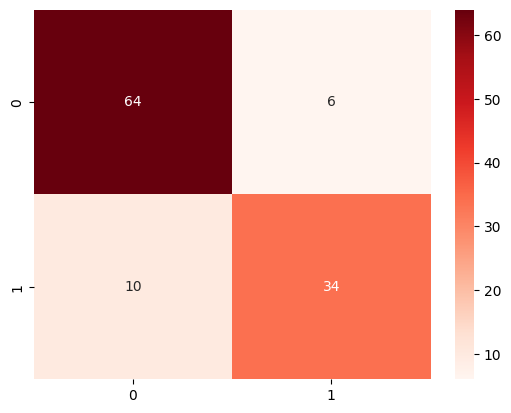

In [29]:
sns.heatmap(conf_matrix, annot=True,fmt='g',cmap="Reds")

<AxesSubplot:>

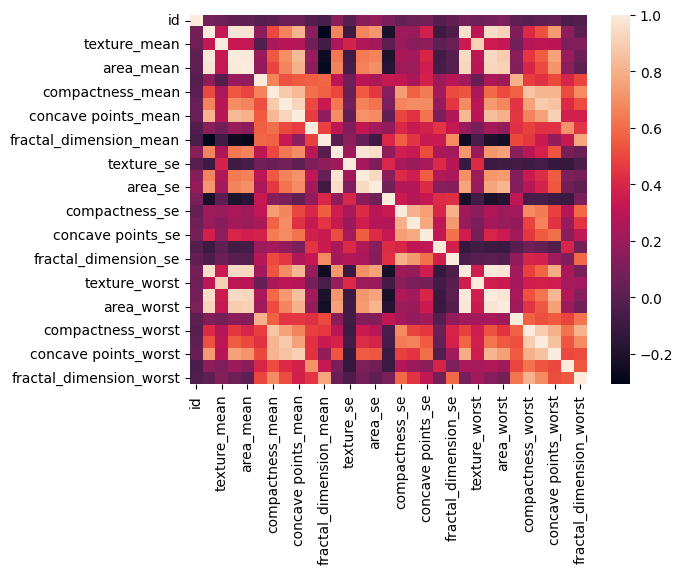

In [15]:
sns.heatmap(df.select_dtypes(exclude=['object']).corr())